In [98]:
try:
    import kagglehub
except ModuleNotFoundError:
    !pip install kagglehub
    import kagglehub
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import time


# Dataset Setup

In [2]:
# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


In [3]:
user_path = list(Path(path).glob("*User*.csv"))[0]
book_path = list(Path(path).glob("*Book*.csv"))[0]
rating_path = list(Path(path).glob("*Rating*.csv"))[0]
books_df = pd.read_csv(book_path,low_memory=False)
ratings_df = pd.read_csv(rating_path)
users_df = pd.read_csv(user_path)

In [4]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


## Data Unwanted Columns

In [7]:
# urls are not helpful for this. drop them
books_df.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=-1,inplace=True)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


## Data 'Publishing Date' cleanup

In [8]:
books_df[books_df['Year-Of-Publication']== 'DK Publishing Inc']

# later on I found that there are two non-year values
# Text(102, 0, 'DK Publishing Inc'), should be 2000
#  Text(103, 0, 'Gallimard'),

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [9]:
# let's replace it with what is in Book-Author. It's probably 2000.
books_df.loc[books_df['Year-Of-Publication']== 'DK Publishing Inc', 'Year-Of-Publication'] = 2000
books_df[books_df['Year-Of-Publication']== 2000]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,2000,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,2000,http://images.amazon.com/images/P/0789466953.0...


In [10]:
books_df[books_df['Year-Of-Publication']== 'Gallimard']
# looks like this was ; seperated not , 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [11]:
books_df.loc[books_df['Year-Of-Publication']== 'Gallimard','Year-Of-Publication']=2003

In [12]:
books_df[books_df['Year-Of-Publication']== 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [13]:
books_df[books_df['Year-Of-Publication']== 2003]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,2003,http://images.amazon.com/images/P/2070426769.0...


In [14]:
print("for books not marked year 0, min and max publication year are: ")
books_df[books_df['Year-Of-Publication'].astype(int)>0]['Year-Of-Publication'].astype(int).min(),books_df['Year-Of-Publication'].astype(int).max()

for books not marked year 0, min and max publication year are: 


(1376, 2050)

## Merge Data

In [15]:
user_rating_df = pd.merge(users_df,ratings_df,on="User-ID")
user_rating_df.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [16]:
user_rating_books_df = pd.merge(user_rating_df,books_df,on="ISBN")
print(user_rating_books_df.shape)
user_rating_books_df.head(2)

(1031136, 9)


,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


## Data 'Location' cleanup

In [17]:
tmp = user_rating_books_df['Location'].apply(lambda x: x.split(', '))
for row in tmp:
    if len(row)>4:
        print(row)
# so it looks like the last item in all of these is country.
# we know we can fill that out pretty reliably.       
# Maybe also the first one being city-ish more often than not

['nanaimo', 'bc', 'v9v 1h4', 'british columbia', 'canada']
['mizunami', 'inatsu', 'hagiwara', 'gifu', 'japan']
['listowel', 'on', 'canada', 'ontario', 'canada']
['valoira', 'a estrada', 'pontevedra', 'galiza', 'spain']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'georgia', 'usa']
['merrick', 'acworth', 'new york', 'geo

In [18]:
def strip_city_country(row):
    items = row['Location'].split(", ")
    # do some niaeve checking. no country/city/county list. 
    # None
    if len(items) == 0:
        return "", ""
    # one
    elif len(items) == 1:
        return "", item[0]
    # 2+ return the first and last since these are most reliable locations filled out
    else:
        return items[0], items[-1]

In [19]:
# fun fact: this way is 6s
user_rating_books_df['location_city'],user_rating_books_df['location_country'] = zip(*user_rating_books_df.apply(strip_city_country,axis=1))

# fun fact this way is 19.439s
# user_rating_books_df[['location_city','location_country']] = user_rating_books_df.apply(strip_city_country,axis=1,result_type="expand")

user_rating_books_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,location_city,location_country
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,stockton,usa
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,timmins,canada
2,8,"timmins, ontario, canada",NaN,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,timmins,canada
3,8,"timmins, ontario, canada",NaN,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,timmins,canada
4,8,"timmins, ontario, canada",NaN,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,timmins,canada


In [20]:
print(f"(min, max) rating scale ({user_rating_books_df['Book-Rating'].min()}, {user_rating_books_df['Book-Rating'].max()})")
# rating scale is 0 - 10
# 0 is implicit. 1-10 is explicit. higher is better score

(min, max) rating scale (0, 10)


In [21]:
implicit_df = user_rating_books_df[user_rating_books_df['Book-Rating'] == 0]
explicit_df = user_rating_books_df[user_rating_books_df['Book-Rating'] > 0]
print("implicit min,max: ",implicit_df['Book-Rating'].min(),", ",implicit_df['Book-Rating'].max())
print("explicit min,max: ",explicit_df['Book-Rating'].min(),", ",explicit_df['Book-Rating'].max())

implicit min,max:  0 ,  0
explicit min,max:  1 ,  10


# my goodreads

In [22]:
df_krystle = pd.read_csv("/home/jovyan/goodreads_library_export.csv")
df_krystle[df_krystle['Book Id']==5]
# example

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies
508,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,"Rowling, J.K.",Mary GrandPré,"=""043965548X""","=""9780439655484""",5,4.58,Scholastic Inc.,...,NaN,2023/06/14,NaN,NaN,read,NaN,NaN,NaN,1,0


In [23]:
df_krystle['ISBN']=df_krystle['ISBN'].str.strip('="')

In [24]:
df_krystle_hasISBN = df_krystle[df_krystle['ISBN']!=""]

In [25]:
df_krystle_hasISBN[df_krystle_hasISBN["ISBN"].isin(user_rating_books_df['ISBN'])][['ISBN','Title','Author',"My Rating"]]

,ISBN,Title,Author,My Rating
238,0670532576,The Outsiders,S.E. Hinton,4
487,0812550706,"Ender’s Game (Ender's Saga, #1)",Orson Scott Card,5
491,0446365386,Gone with the Wind,Margaret Mitchell,2
493,0141439661,Sense and Sensibility,Jane Austen,5
496,0142437204,Jane Eyre,Charlotte Brontë,5
497,0140283331,Lord of the Flies,William Golding,4
508,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,5
510,0060935464,To Kill a Mockingbird,Harper Lee,3


In [26]:
df_krystle[df_krystle['My Rating']>0].aggregate({'My Rating':'average'})
# yea I definitely do uber rating style....


My Rating    4.679083
dtype: float64

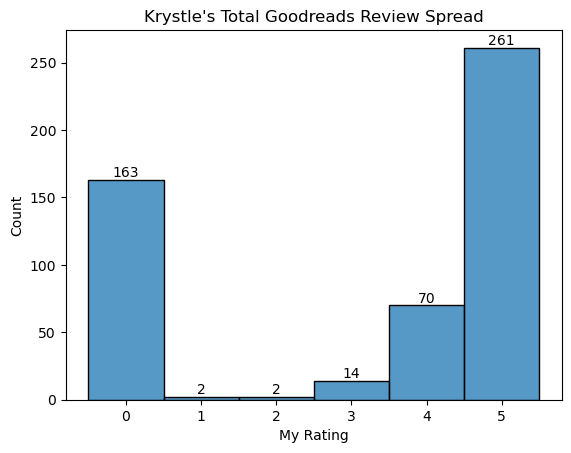

In [27]:
ax = sns.histplot(df_krystle['My Rating'],discrete=True)
ax.set_title("Krystle's Total Goodreads Review Spread")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

In [28]:
df_krystle[df_krystle['Date Read'].isna()]
df_krystle['Exclusive Shelf'].unique()
# array(['read', 'currently-reading', 'dnf', 'to-read'], dtype=object)



array(['read', 'currently-reading', 'dnf', 'to-read'], dtype=object)

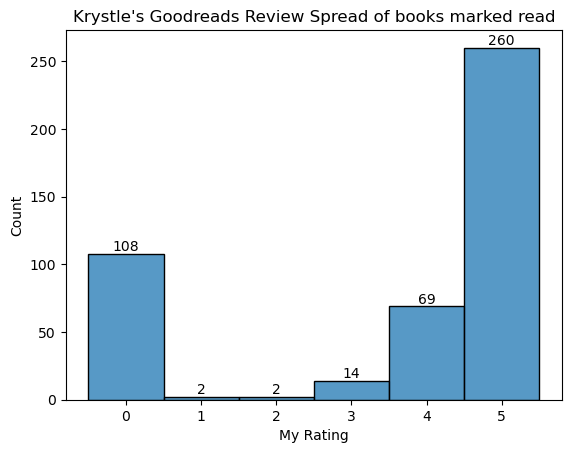

In [29]:
read = df_krystle[df_krystle['Exclusive Shelf']=='read']
ax = sns.histplot(read['My Rating'],discrete=True)
ax.set_title("Krystle's Goodreads Review Spread of books marked read")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

In [30]:
read[read['My Rating'].isin((1,2))][['Title',"My Rating"]]
# it's weird that I would have even marked something as 1 or 2 stars if I finised it at all
# These books are what I was asked in the beginning of my goodreads account of read/interested in books to seed the recommendations

,Title,My Rating
491,Gone with the Wind,2
492,"Anne of Green Gables (Anne of Green Gables, #1)",2
500,"Fifty Shades Freed (Fifty Shades, #3)",1
501,"Fifty Shades Darker (Fifty Shades, #2)",1


In [31]:
read.columns

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Owned Copies'],
      dtype='object')

In [32]:
read[read['My Rating']==3][['Title','My Rating']]
# 6 of these 14 are from when I made the account

,Title,My Rating
39,A Cursed Son (Remnants of the Fallen Kingdom #1),3
116,Evil Twin (Villains in Love),3
162,The Throne of Honor and Blood (The Mortal Fate...,3
170,"Mercy (Deridia, #1)",3
171,"City of Gods and Monsters (House of Devils, #1)",3
202,A ​Court of Silver Flames (A Court of Thorns a...,3
237,The Seven Principles for Making Marriage Work:...,3
247,Nettle & Bone,3
474,"Out of Spite, Out of Mind (Magic 2.0 #5)",3
490,Things I Wish I'd Known Before We Got Married,3


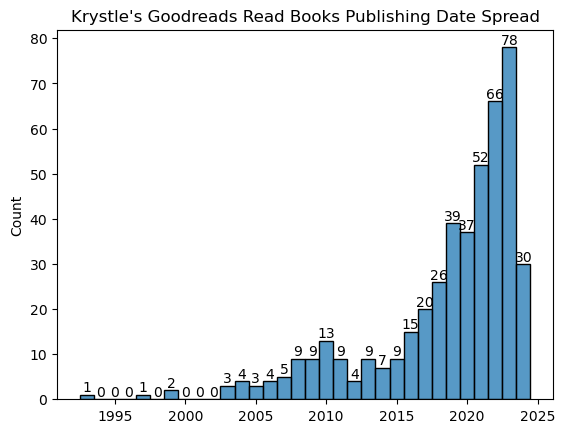

In [34]:
ax = sns.histplot(sorted(read['Year Published']),discrete=True)
ax.set_title("Krystle's Goodreads Read Books Publishing Date Spread")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rating exploration

/tmp/ipykernel_44561/894074222.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


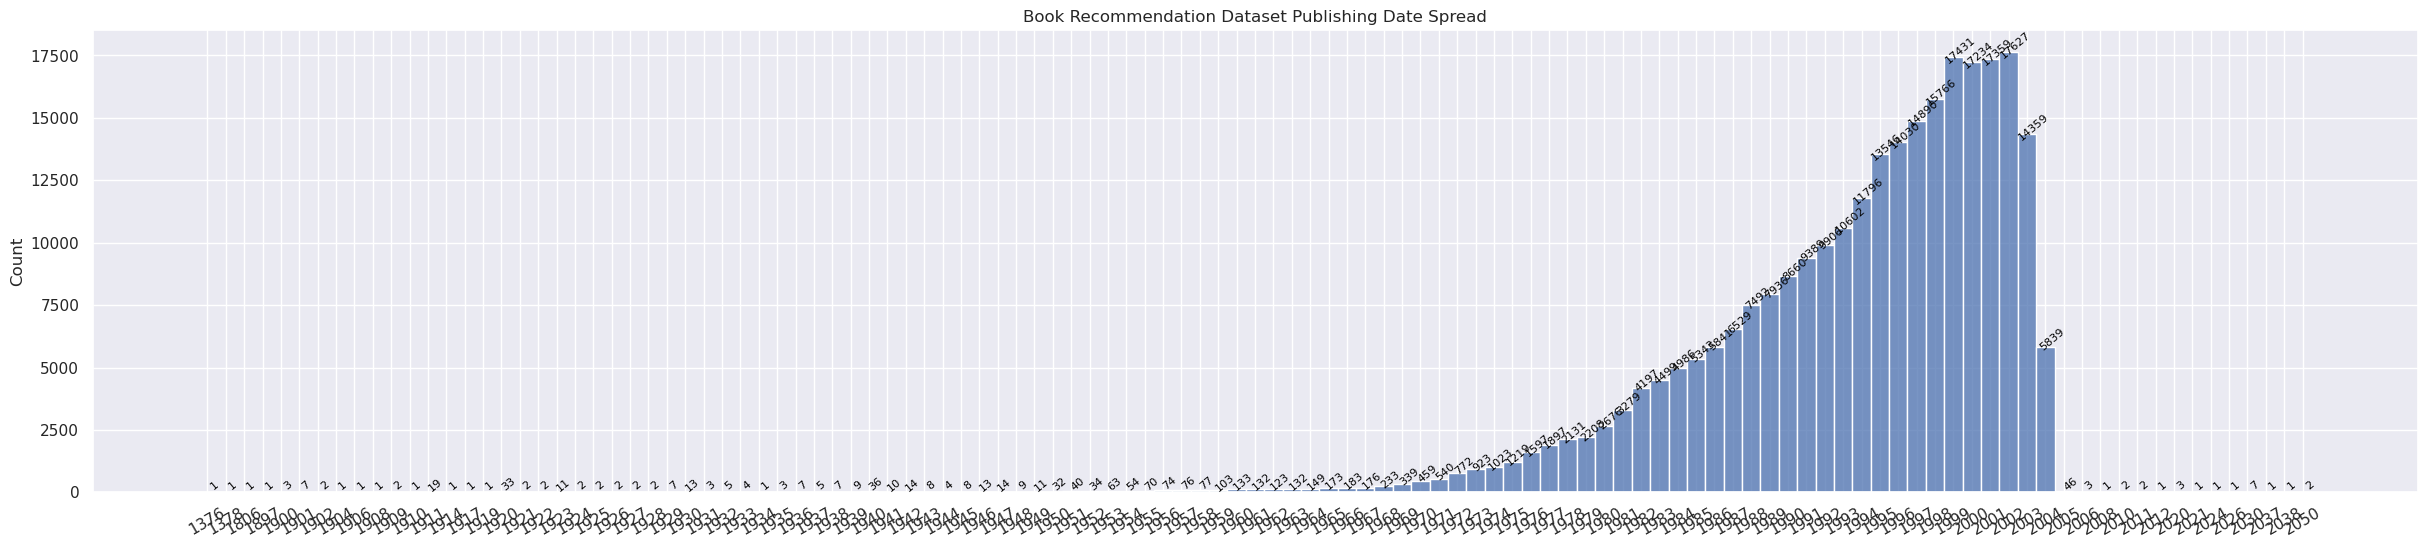

In [85]:
sns.set_theme(rc={'figure.figsize':(30,6)})
# find entries with publication years > 0 
ax = sns.histplot(sorted(books_df[books_df['Year-Of-Publication'].astype(int)>0]['Year-Of-Publication'].astype(str)),discrete=True)
ax.set_title("Book Recommendation Dataset Publishing Date Spread")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(5, 5),
                textcoords='offset points',rotation=40)

Find dataset books from Krystle's books > than publishing year 1993


/tmp/ipykernel_44561/750750268.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


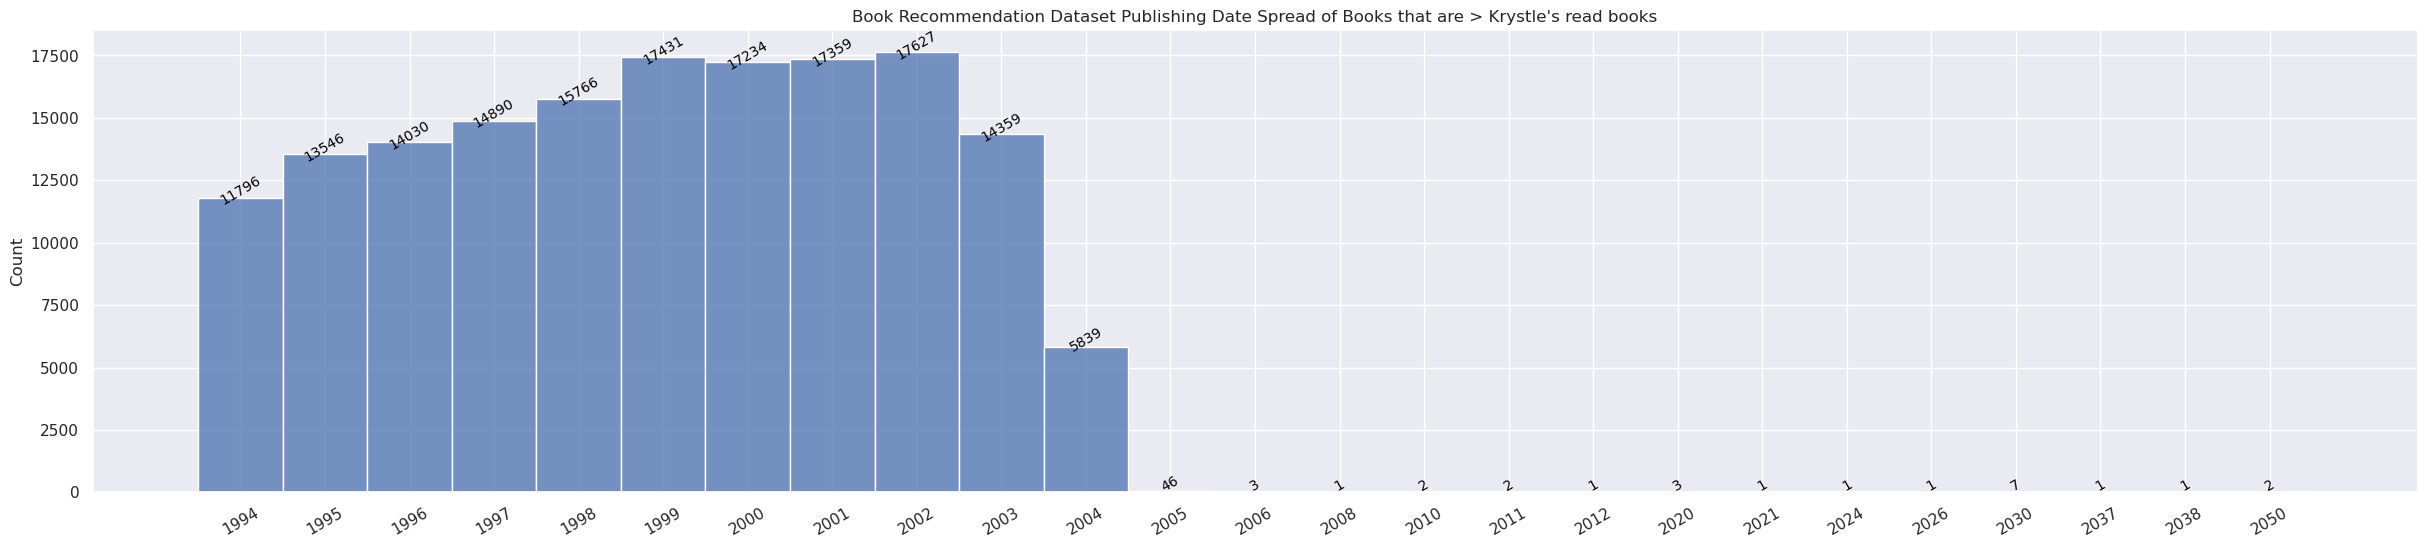

In [78]:
# This is now reran with the fixed dataset
sns.set_theme(rc={'figure.figsize':(30,6)})
print(f"Find dataset books from Krystle's books > than publishing year {read['Year Published'].astype(int).min()}")
# find entries with publication years > 0
ax = sns.histplot(sorted(books_df[books_df['Year-Of-Publication'].astype(int)>read['Year Published'].astype(int).min()]['Year-Of-Publication'].astype(str)),discrete=True)
ax.set_title("Book Recommendation Dataset Publishing Date Spread of Books that are > Krystle's read books")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points',rotation=30)

In [39]:
books_df[books_df['Year-Of-Publication'].astype(int)>2025][['Year-Of-Publication','Book-Title']]

,Year-Of-Publication,Book-Title
37487,2030,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...
55676,2030,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...
78168,2030,Crossing America
80264,2050,Alice's Adventures in Wonderland and Through t...
97826,2050,Outline of European Architecture (Pelican S.)
116053,2038,Three Plays of Eugene Oneill
118294,2026,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
192993,2030,"Field Guide to the Birds of North America, 3rd..."
228173,2030,FOREST PEOPLE (Touchstone Books (Hardcover))
240169,2030,In Our Time: Stories (Scribner Classic)


This image made me realize some publishing years were incorrect
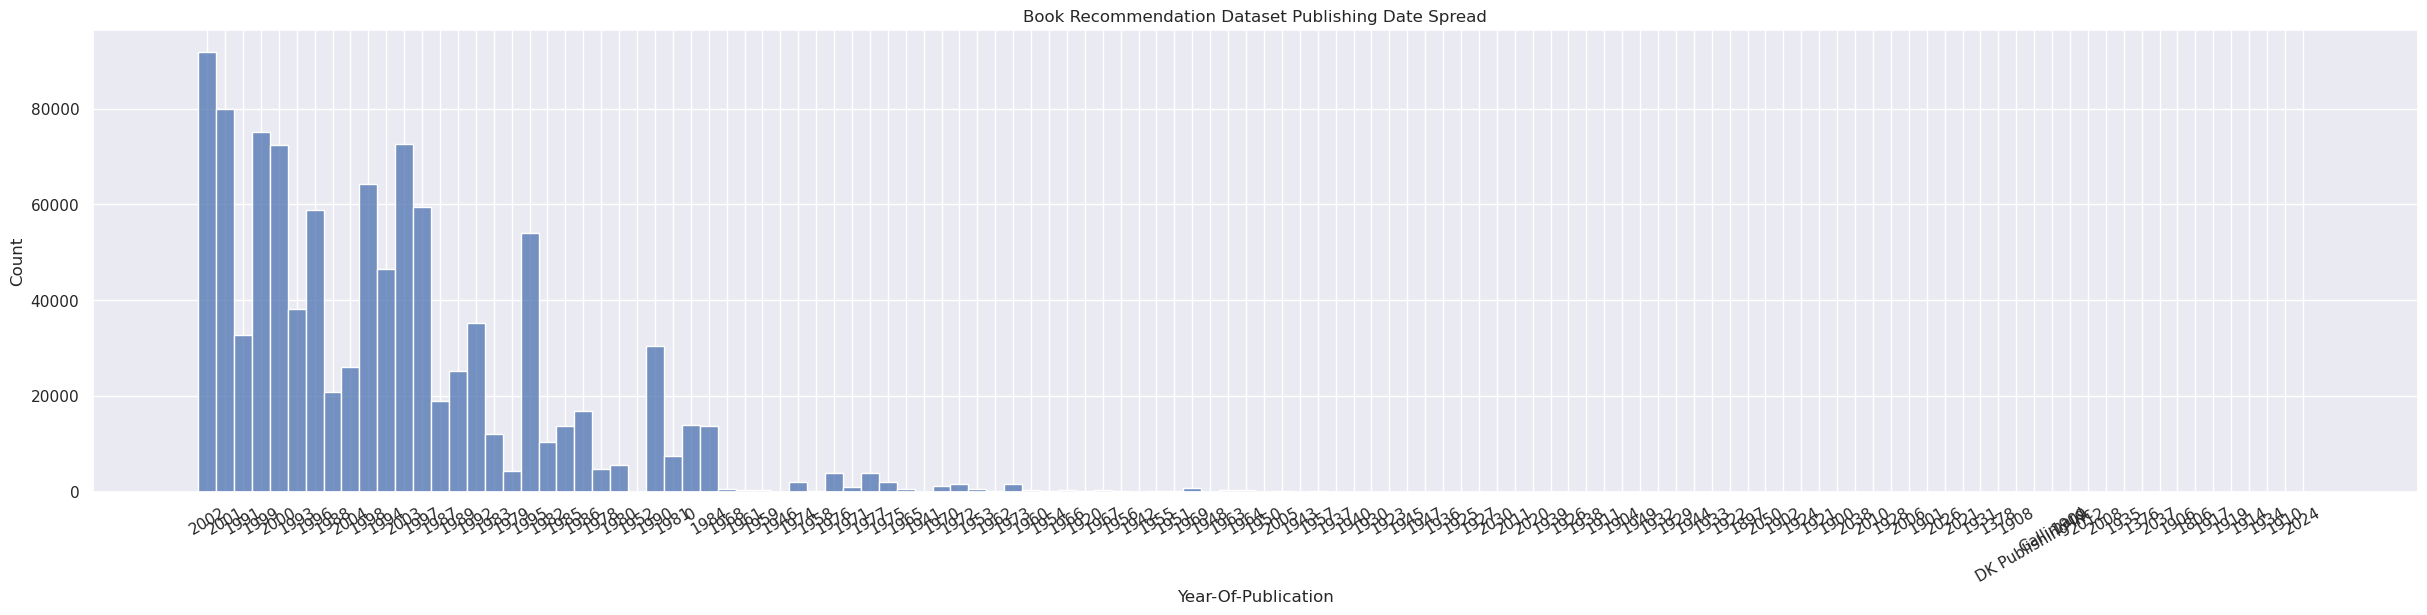

In [40]:
# use explicit ratings 1 - 10
mean_ratings = explicit_df.groupby("User-ID")['Book-Rating'].mean()
mean_ratings[mean_ratings>5]

User-ID
8          5.571429
9          6.000000
12        10.000000
14         5.333333
16         9.000000
            ...    
278846     8.000000
278849     9.000000
278851     6.500000
278852     8.000000
278854     7.000000
Name: Book-Rating, Length: 60620, dtype: float64

In [45]:
user_rating_counts_exp = explicit_df.groupby("User-ID")['Book-Rating'].count()
print(f"(min, max) number of reviews ({user_rating_counts_exp.min()}, {user_rating_counts_exp.max()})")
print(sorted(user_rating_counts_exp)[-20:])

(min, max) number of reviews (1, 6943)
[504, 524, 563, 567, 603, 606, 698, 777, 781, 837, 941, 959, 962, 1012, 1020, 1180, 1845, 1899, 5691, 6943]


In [46]:
user_rating_counts_imp = implicit_df.groupby("User-ID")['Book-Rating'].count()
print(f"(min, max) number of reviews ({user_rating_counts_imp.min()}, {user_rating_counts_imp.max()})")
print(sorted(user_rating_counts_imp)[-20:])

(min, max) number of reviews (1, 6439)
[1961, 2130, 2169, 2171, 2187, 2194, 2216, 2251, 2327, 2350, 2541, 2552, 2681, 3266, 3890, 3969, 4201, 4286, 4869, 6439]


max explicit rated books 6943
mean 7.355465936914879


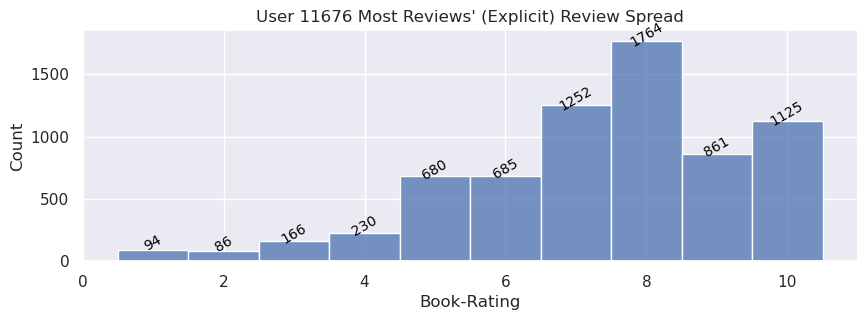

In [105]:
print("max explicit rated books", sorted(user_rating_counts_exp)[-1])
# who is this person who rated 6.9k books?! 
# it is double the last rating!
print("mean",explicit_df[explicit_df['User-ID']==11676]['Book-Rating'].mean())
sns.set_theme(rc={'figure.figsize':(10,3)})
ax = sns.histplot(explicit_df[explicit_df['User-ID']==11676]['Book-Rating'],discrete=True)
ax.set_title("User 11676 Most Reviews' (Explicit) Review Spread")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points',rotation=30)

max rated implicit books 6439
User-ID
198711    6439
Name: Book-Rating, dtype: int64
mean 7.235294117647059


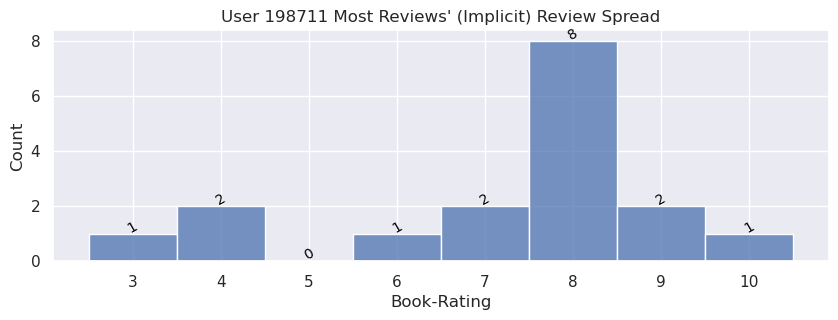

In [106]:
print("max rated implicit books",sorted(user_rating_counts_imp)[-1])
print(user_rating_counts_imp[user_rating_counts_imp == 6439])
# who is this person who read but didn't rate 6.4k books?! 
sns.set_theme(rc={'figure.figsize':(10,3)})

print("mean",explicit_df[explicit_df['User-ID']==198711]['Book-Rating'].mean())
ax = sns.histplot(explicit_df[explicit_df['User-ID']==198711]['Book-Rating'],discrete=True,)
ax.set_title("User 198711 Most Reviews' (Implicit) Review Spread")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points',rotation=30)

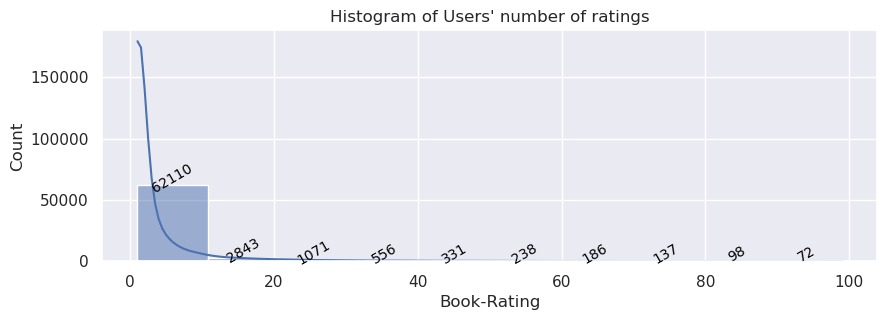

In [107]:
sns.set_theme(rc={'figure.figsize':(10,3)})

user_rating_counts = explicit_df.groupby("User-ID")['Book-Rating'].count()
ax = sns.histplot(user_rating_counts[user_rating_counts<100],kde=True,bins=10)
ax.set_title("Histogram of Users' number of ratings")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points',rotation=30)
# TODO fixme

([<matplotlib.axis.XTick at 0x7f1dbef19a50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

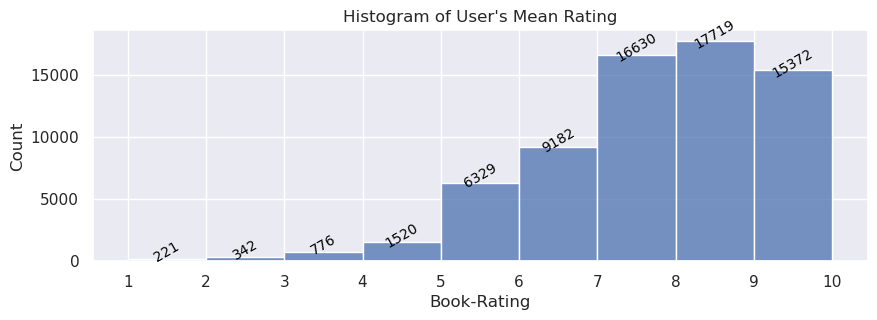

In [108]:
sns.set_theme(rc={'figure.figsize':(10,3)})

ax = sns.histplot(mean_ratings,bins=10,binwidth=1,)
ax.set_title("Histogram of User's Mean Rating")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points',rotation=30)
plt.xticks(range(1,11))

# Recommender

In [118]:
try:
    from surprise import NormalPredictor, KNNBasic, NMF, SlopeOne, SVD, Dataset, Reader
    from surprise.model_selection import cross_validate
except ModuleNotFoundError:
    !pip install surprise
    from surprise import NormalPredictor, KNNBasic, NMF, SlopeOne, SVD, Dataset
    from surprise.model_selection import cross_validate

In [111]:
# Creates some variables to be used in the section
results = dict() # dictionary to collect results from the different simulations 
errordict = {'RMSE':{'key':'test_rmse','name':'Root Mean Square Error'},
             'MAE':{'key':'test_mae','name':'Mean Absolute Error'}}

In [116]:
explicit_df.columns

Index(['User-ID', 'Location', 'Age', 'ISBN', 'Book-Rating', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'location_city',
       'location_country'],
      dtype='object')

In [120]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(explicit_df[['ISBN','User-ID','Book-Rating']],reader)

In [121]:
algo = NormalPredictor()
scores = cross_validate(algo, data, measures=['RMSE','MAE'], cv=10, verbose=True,n_jobs=-1)
results['Random_baseline'] = scores

Evaluating RMSE, MAE of algorithm NormalPredictor on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    2.5068  2.5032  2.5019  2.5000  2.5020  2.4993  2.4836  2.5071  2.4996  2.4931  2.4997  0.0066  
MAE (testset)     1.9978  1.9977  1.9968  1.9994  1.9979  1.9893  1.9786  2.0009  2.0024  1.9885  1.9949  0.0069  
Fit time          0.22    0.22    0.22    0.22    0.22    0.22    0.22    0.22    0.22    0.22    0.22    0.00    
Test time         0.13    0.12    0.12    0.12    0.12    0.12    0.12    0.12    0.12    0.12    0.12    0.00    


In [ ]:
algo = KNNBasic(verbose=False)
scores = cross_validate(algo, data, measures=['RMSE','MAE'], cv=10, verbose=True,n_jobs=-1)
results['User-based Collaborative Filtering'] = scores